In [2]:
# 4.10 Coding Etiquette & Excel Reporting

In [3]:
# Importing Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy 

In [4]:
# Defining the path
path = r'/Users/sijju/Downloads/Data analysis/Data Immersion/Acheivement 4/Acheivement 4 project'

In [5]:
#Step 1- import Dataset
df_merged = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customers_aggregated.pkl'))

In [6]:
#Step 2- Security Implications
df_merged.head(1)

product_id                product_name  aisle_id  department_id  prices  \
0           1  Chocolate Sandwich Cookies        61             19     5.8   

   order_id  user_id eval_set  order_number  order_dow  ...  first_name  \
0   3139998      138    prior            28          6  ...     Charles   

   last_name  gender      STATE age date_joined n_dependants  fam_status  \
0        Cox    Male  Minnesota  81    8/1/2019            1     married   

  income  _merge  
0  49620    both  

[1 rows x 33 columns]

#### There are columns that refer to client first and surnames, as well as gender, state, age, family status and number of dependants. These columns are personally identifiable information (PII).

In [7]:
# Dropping personal information
df_merged.drop(columns=['first_name','last_name'], inplace= True)

In [8]:
df_merged.head(1)

product_id                product_name  aisle_id  department_id  prices  \
0           1  Chocolate Sandwich Cookies        61             19     5.8   

   order_id  user_id eval_set  order_number  order_dow  ...  \
0   3139998      138    prior            28          6  ...   

   median_days_between_orders    order_frequency  gender      STATE age  \
0                         8.0  Frequent customer    Male  Minnesota  81   

  date_joined n_dependants  fam_status income  _merge  
0    8/1/2019            1     married  49620    both  

[1 rows x 31 columns]

#### The data is now unpersonalised and therefore secure.

In [9]:
## 3. Customer behavior in different geographic areas

In [10]:
# Creating a region column and grouping states Northeast
df_merged.loc[df_merged['STATE'].isin(['Maine','New Hampshire','Vermont','Massachusetts','Rhode Island','Connecticut','New York','Pennsylvania',
'New Jersey']),'region'] = 'Northeast'

In [11]:
# Creating a region column and grouping states Midwest
df_merged.loc[df_merged['STATE'].isin(['Wisconsin','Michigan','Illinois','Indiana','Ohio','North Dakota','South Dakota','Nebraska',
'Kansas','Minnesota','Iowa','Missouri']),'region'] = 'Midwest'

In [12]:
# Creating a region column and grouping states South
df_merged.loc[df_merged['STATE'].isin(['Delaware','Maryland','District of Columbia','Virginia','West Virginia','North Carolina','South Carolina','Georgia',
'Florida','Kentucky','Tennessee','Mississippi','Alabama','Oklahoma','Texas','Arkansas','Louisiana']),'region'] = 'South'

In [13]:
# Creating a region column and grouping states Mountain
df_merged.loc[df_merged['STATE'].isin(['Idaho','Montana','Wyoming','Nevada','Utah','Colorado','Arizona','New Mexico','Alaska','Washington','Oregon','California','Hawaii']),'region'] = 'Mountain'

In [14]:
# Checking if all columns have been attributed a value
df_merged['region'].value_counts(dropna= False)

region
South        10791885
Mountain      8292913
Midwest       7597325
Northeast     5722736
Name: count, dtype: int64

In [15]:
df_merged.head(1)

product_id                product_name  aisle_id  department_id  prices  \
0           1  Chocolate Sandwich Cookies        61             19     5.8   

   order_id  user_id eval_set  order_number  order_dow  ...  \
0   3139998      138    prior            28          6  ...   

     order_frequency  gender      STATE  age date_joined n_dependants  \
0  Frequent customer    Male  Minnesota   81    8/1/2019            1   

  fam_status  income _merge   region  
0    married   49620   both  Midwest  

[1 rows x 32 columns]

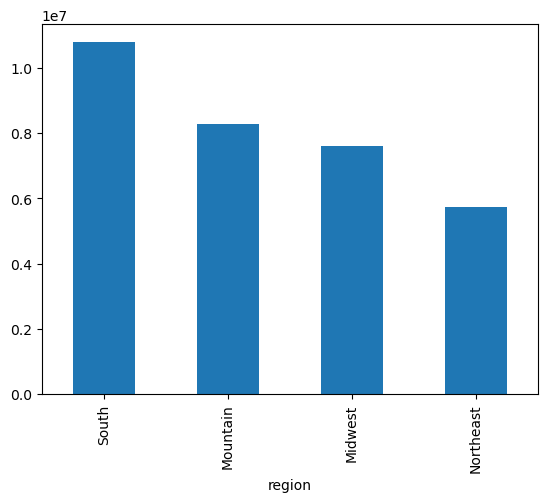

In [16]:
# Creating a bar chart
bar_customer_region = df_merged['region'].value_counts().plot.bar()

### The bar chart shows that the maximum number of clients are from the South region and minimum number of the clients are from the Northwest region.

In [17]:
# Determining whether there is a difference in spending habits
df_avg_spend = df_merged.groupby(['order_frequency'])['mean_product_price'].mean()

In [18]:
df_avg_spend.drop(index='nan',inplace=True)

Text(0, 0.5, 'Avg per item')

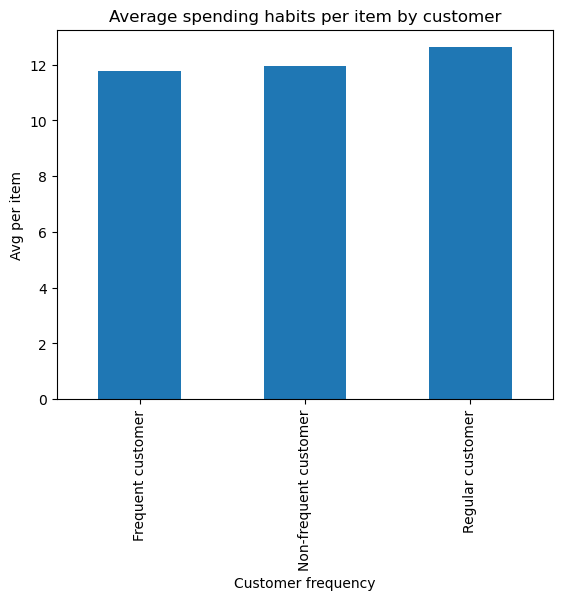

In [19]:
# Creating a bar chart of spending habits of clients 
bar_avg_spend = df_avg_spend.plot.bar()
plt.title('Average spending habits per item by customer')
plt.xlabel('Customer frequency') 
plt.ylabel('Avg per item')

### The above bar chart shows that the regular customer spend by far the most on an average per item.

In [20]:
# Determining whether there is a difference in spending habits between different regions
df_spend_region = df_merged.groupby(['region'])['mean_product_price'].mean() 
df_spend_region.reset_index()

region  mean_product_price
0    Midwest           12.715483
1   Mountain           11.319834
2  Northeast           11.554997
3      South           12.195577

Text(0.5, 0, 'Region')

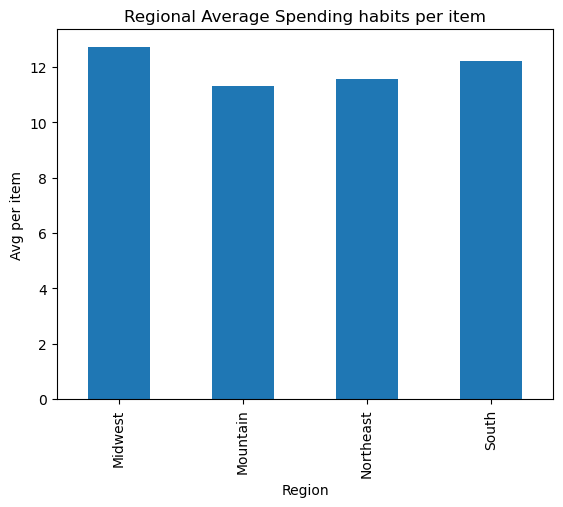

In [21]:
# Creating a bar chart for spending habits between different regions
bar_spend_region = df_spend_region.plot.bar(ylabel='avg.spend')
plt.title('Regional Average Spending habits per item')
plt.ylabel('Avg per item')
plt.xlabel('Region')

#### This bar chart is showing that region wise, customers from the midwest region is spending the most on an average per item.

In [22]:
# Exporting all the visualizations
bar_spend_region.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','bar_spend_region.png'))
bar_avg_spend.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','bar_avg_spend.png'))
bar_customer_region.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','bar_customer_region.png'))

In [23]:
# 4. Exclude low-activity customers

In [24]:
# creating exclusion flag column
df_merged.loc[df_merged['max_order']>=5, 'exclusion_flag'] = 'Not Excluded'
df_merged.loc[df_merged['max_order']<5, 'exclusion_flag'] = 'Excluded'

In [25]:
# Checking the column
df_merged['exclusion_flag'].value_counts()

exclusion_flag
Not Excluded    30964564
Excluded         1440295
Name: count, dtype: int64

In [26]:
# Create data frame with only the excluded data
df_merged_excluded = df_merged[df_merged['exclusion_flag']=='Excluded']

In [27]:
# Create data frame with only the not-excluded data
df_merged_not_excluded =  df_merged[df_merged['exclusion_flag']=='Not Excluded']

In [28]:
# Checking the length of datasets
len(df_merged_excluded) + len (df_merged_not_excluded) == len(df_merged)

True

In [29]:
# Export new data frame
df_merged_not_excluded.to_pickle(os.path.join(path,'02 Data','Prepared Data','orders_products_not_excluded'))

In [30]:
# 5. Customer profiling

In [31]:
# Creating income categories using loc function
df_merged_not_excluded.loc[df_merged_not_excluded['income'] < 50000,'income_type'] = 'Low'
df_merged_not_excluded.loc[(df_merged_not_excluded['income'] >= 50000) & (df_merged_not_excluded['income']< 100000),'income_type'] = 'Middle'
df_merged_not_excluded.loc[df_merged_not_excluded['income']>= 100000,'income_type'] = 'High'

/var/folders/p6/wvfy00k95sb7mkdhmgy5734h0000gn/T/ipykernel_58681/1278431874.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged_not_excluded.loc[df_merged_not_excluded['income'] < 50000,'income_type'] = 'Low'


In [32]:
# Creating age categories using loc function
df_merged_not_excluded.loc[df_merged_not_excluded['age']< 40,'age_type'] = 'Young Adult'
df_merged_not_excluded.loc[(df_merged_not_excluded['age'] >= 40) & (df_merged_not_excluded['age']< 65),'age_type'] = 'Middle Aged'
df_merged_not_excluded.loc[df_merged_not_excluded['age']>= 65,'age_type'] = 'Senior'

/var/folders/p6/wvfy00k95sb7mkdhmgy5734h0000gn/T/ipykernel_58681/211161080.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged_not_excluded.loc[df_merged_not_excluded['age']< 40,'age_type'] = 'Young Adult'


In [33]:
# Creating n_dependants categories using loc function
df_merged_not_excluded['dependant_type'] = 'No Dependants'
df_merged_not_excluded.loc[df_merged_not_excluded['n_dependants']> 0,'dependant_type'] = 'Has Dependants'

/var/folders/p6/wvfy00k95sb7mkdhmgy5734h0000gn/T/ipykernel_58681/2427622111.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged_not_excluded['dependant_type'] = 'No Dependants'


In [34]:
## 6. Creating Visualizations

In [35]:
# Calculate percentage distribution of loyalty
loyalty_distribution = (df_merged_not_excluded['loyalty_flag'].value_counts(normalize = True) * 100).sort_index()

(-1.0999998584708166,
 1.0999999932605151,
 -1.099999974935724,
 1.099999998600251)

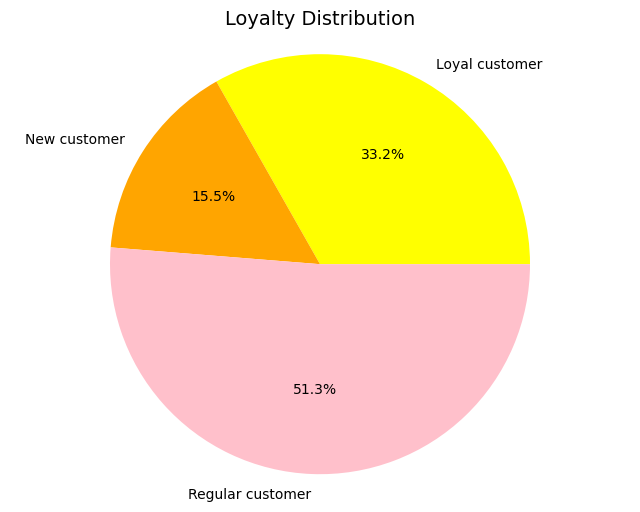

In [36]:
# Creating a pie chart
plt.figure(figsize=(8, 6)) 
# Set figure size
loyalty_pie = plt.pie(loyalty_distribution, labels=loyalty_distribution.index, autopct='%1.1f%%', colors=['yellow', 'orange', 'pink'])
plt.title('Loyalty Distribution', fontsize=14)
plt.axis('equal')

In [69]:
# Export the pie chart
plt.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pie_loyalty.png'))

AttributeError: 'function' object has no attribute 'savefig'

In [38]:
## 7. Aggregate the max, mean, and min variables on a customer-profile level

In [39]:
df_merged_not_excluded['total_expenditure']= df_merged_not_excluded.groupby('user_id')['prices'].transform(np.sum)

/var/folders/p6/wvfy00k95sb7mkdhmgy5734h0000gn/T/ipykernel_58681/1705628768.py:1: FutureWarning: The provided callable <function sum at 0x10980cf40> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df_merged_not_excluded['total_expenditure']= df_merged_not_excluded.groupby('user_id')['prices'].transform(np.sum)
/var/folders/p6/wvfy00k95sb7mkdhmgy5734h0000gn/T/ipykernel_58681/1705628768.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged_not_excluded['total_expenditure']= df_merged_not_excluded.groupby('user_id')['prices'].transform(np.sum)


In [40]:
# Calcualting the mean, max, min based on loyalty_flag
df_merged_not_excluded.groupby('loyalty_flag').agg({'total_expenditure': ['mean', 'min', 'max'], 'order_number': ['mean', 'min', 'max']})

total_expenditure                   order_number        
                              mean    min        max         mean min max
loyalty_flag                                                             
Loyal customer         8089.330353  156.0  2101976.9    32.641196   1  99
New customer           1345.178107    5.0   800423.2     4.268295   1  10
Regular customer       3866.475690   15.7  2104114.1    12.347452   1  40

In [41]:
# Calcualting the mean, max, min based on income_type
df_merged_not_excluded.groupby('income_type').agg({'total_expenditure': ['mean', 'min', 'max'], 'order_number': ['mean', 'min', 'max']})

total_expenditure                  order_number        
                         mean   min        max         mean min max
income_type                                                        
High              6547.130743  24.7  2104114.1    17.918880   1  99
Low               2525.917679   5.0    24307.1    16.835516   1  99
Middle            3697.694358  11.2  1102546.5    17.994953   1  99

In [42]:
# Calcualting the mean, max, min based on region
df_merged_not_excluded.groupby('region').agg({'total_expenditure': ['mean', 'min', 'max'], 'order_number': ['mean', 'min', 'max']})

total_expenditure                 order_number        
                       mean  min        max         mean min max
region                                                          
Midwest         5191.098827  7.0  2104114.1    17.602828   1  99
Mountain        4525.095845  5.0  1003648.4    17.971929   1  99
Northeast       4834.964962  7.7  1409778.9    17.921760   1  99
South           4951.166439  6.8  1206437.5    17.844674   1  99

In [43]:
# Calcualting the mean, max, min based on dependant_type
df_merged_not_excluded.groupby('dependant_type').agg({'total_expenditure': ['mean', 'min', 'max'], 'order_number': ['mean', 'min', 'max']})

total_expenditure                 order_number        
                            mean  min        max         mean min max
dependant_type                                                       
Has Dependants       4920.314739  6.8  2104114.1    17.792891   1  99
No Dependants        4750.413525  5.0  2101976.9    17.957922   1  99

In [44]:
#8. Compare customer profiles with regions and departments

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 0, 'Count')

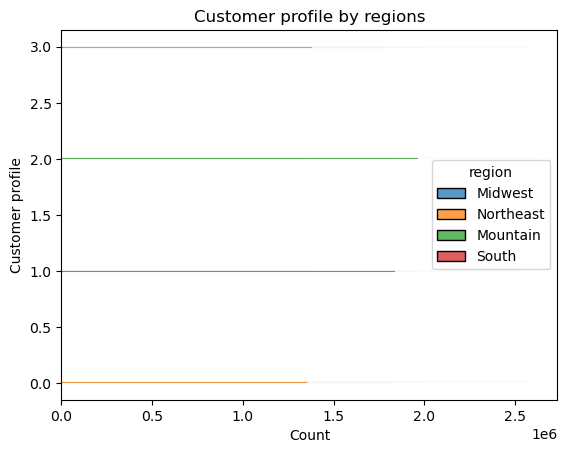

In [75]:
# Plotting histogram of customer type by region
hist=sns.histplot(data=df_merged_not_excluded, y='n_dependants' ,hue='region',multiple='dodge', shrink=.8)
plt.title('Customer profile by regions')
plt.ylabel('Customer profile')
plt.xlabel('Count')

In [76]:
# Export histogram
hist.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','Customer_profile_by_region_bar.png'))

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 0, 'count')

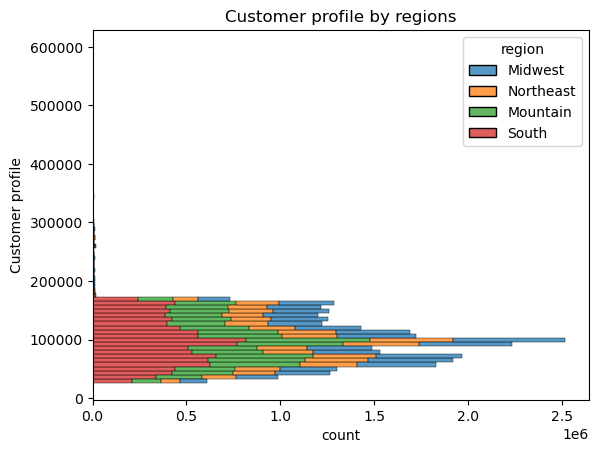

In [73]:
# Plotting histogram of customer type by region
hist_1 = sns.histplot(data=df_merged_not_excluded, y='income', hue='region', binwidth=7000, multiple='stack')
plt.title('Customer profile by regions')
plt.ylabel('Customer profile')
plt.xlabel('count')

In [74]:
# Export histogram
hist_1.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','Customer_profile_income_by_region_bar.png'))

In [67]:
## 9. Export

In [77]:
df_merged_not_excluded.to_pickle(os.path.join(path,'02 Data','Prepared Data','4_10_final_data'))